# A2 Car Prices Assingment

### 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.9.4')

### 2. Load Data

In [3]:
#Load Data
df = pd.read_csv('Cars.csv')

In [4]:
#print the first rows of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
#Checking shape of the data
df.shape

(8128, 13)

In [6]:
#Statiscal Info of the data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
#Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
#Check column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 3. Exploratory Data Analysis (EDA)

In [9]:
#Check column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
#renaming column 'name' to 'brand'
df.rename(columns= {
    'name': 'brand'}, inplace= True)

df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

#### Univariate analyis

##### Count Plot

<Axes: xlabel='owner', ylabel='count'>

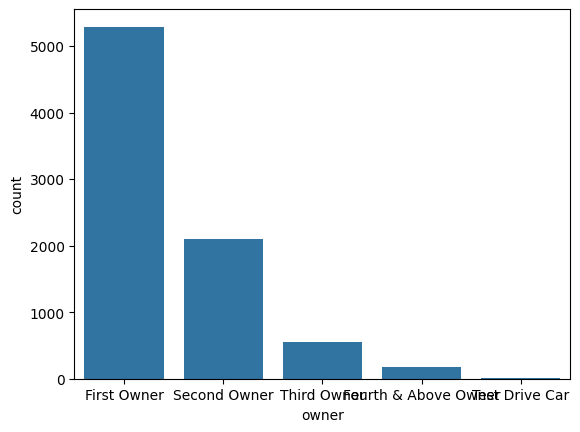

In [11]:
sns.countplot(data = df, x = 'owner')

##### Dis Plot

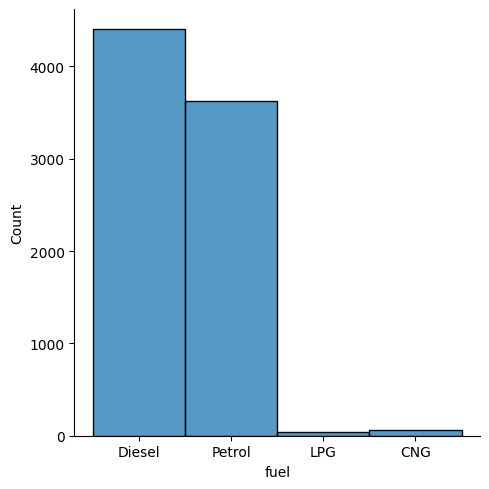

In [12]:
sns.displot(data = df, x = 'fuel')

#### Multivariate analysis

##### Box Plot

Text(0.5, 0, 'Fuel Type')

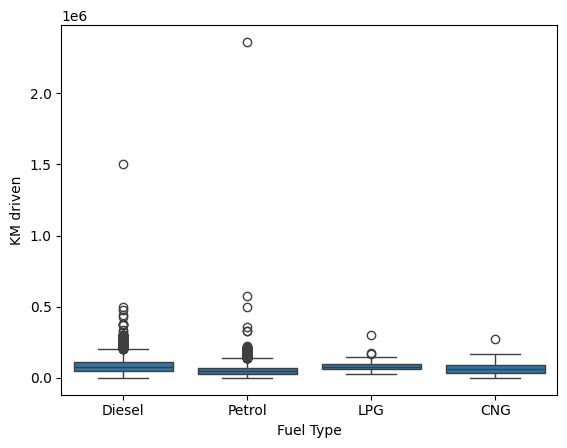

In [13]:
sns.boxplot(x = df["fuel"], y = df["km_driven"]);
plt.ylabel("KM driven")
plt.xlabel("Fuel Type")

##### Scatter Plot

<Axes: xlabel='year', ylabel='selling_price'>

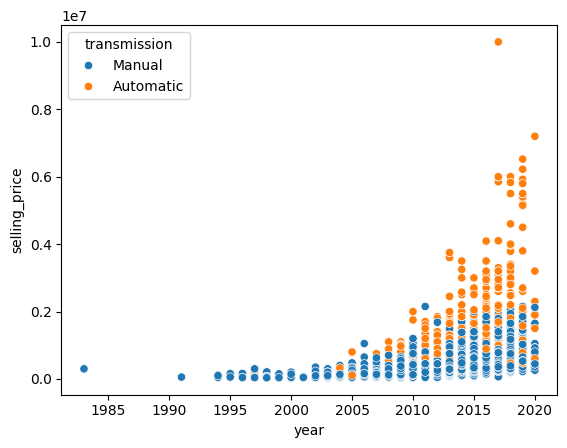

In [14]:
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['transmission'])

#### Bar Sub Plot

In [15]:
df.dtypes
num_col = df.select_dtypes(include=['int64', 'float64'])
# numcol = numcol.drop([]) #Loan_Status
cat_col = df.select_dtypes(exclude=['int64', 'float64'])
num_col.columns, cat_col.columns

(Index(['year', 'selling_price', 'km_driven', 'seats'], dtype='object'),
 Index(['brand', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage',
        'engine', 'max_power', 'torque'],
       dtype='object'))

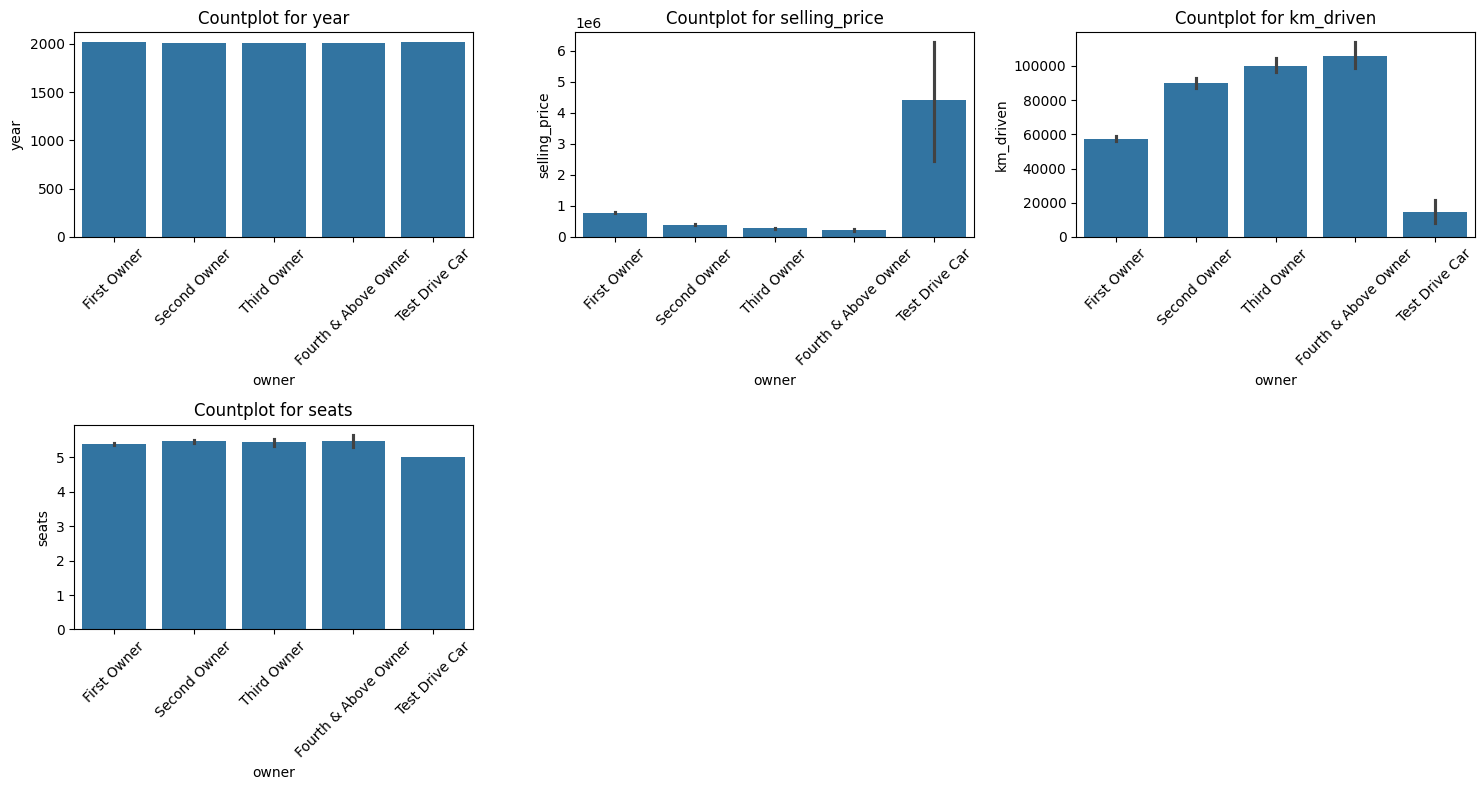

In [16]:
# Number of categorical columns
num_cols = len(num_col.columns)

# Set up the subplot grid dimensions
rows = (num_cols + 2) // 3  #
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4)) 
axes = axes.flatten()  

# Iterate through the categorical columns and plot countplots
for i, col in enumerate(num_col.columns):
    sns.barplot(x = df['owner'], y = df[col],ax=axes[i])

    axes[i].set_title(f'Countplot for {col}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

#### Histogram Sub plot

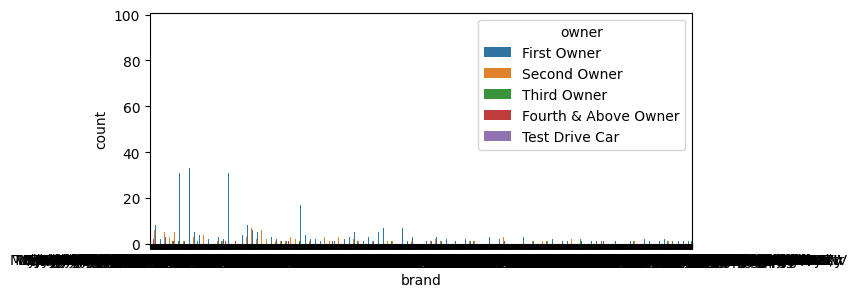

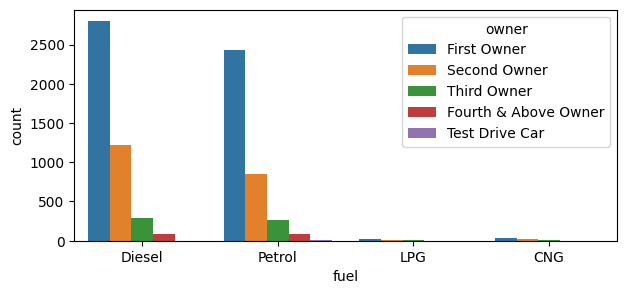

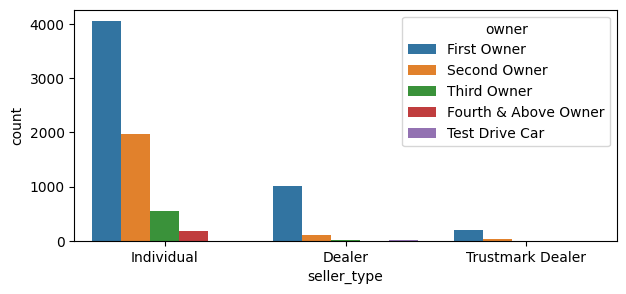

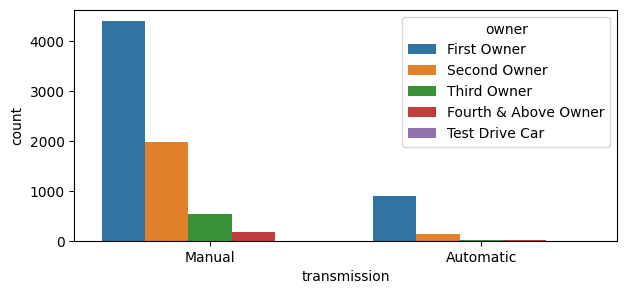

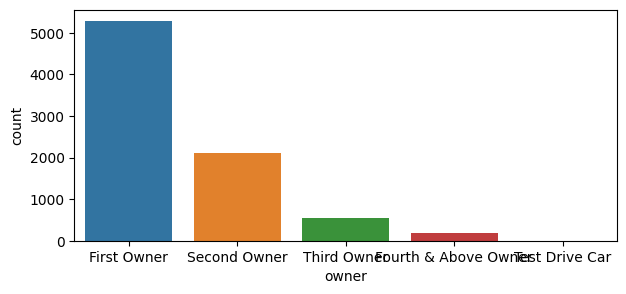

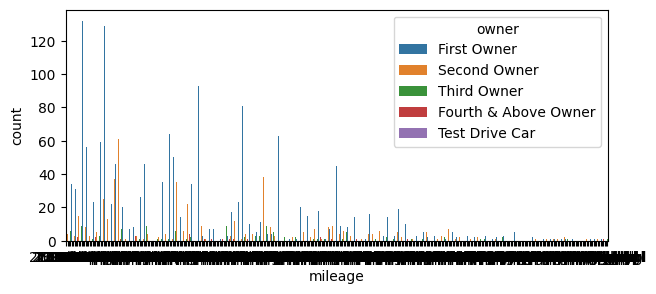

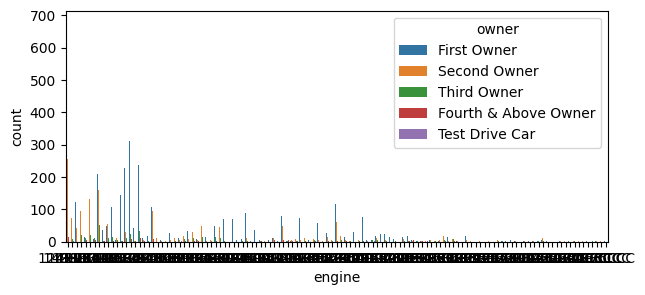

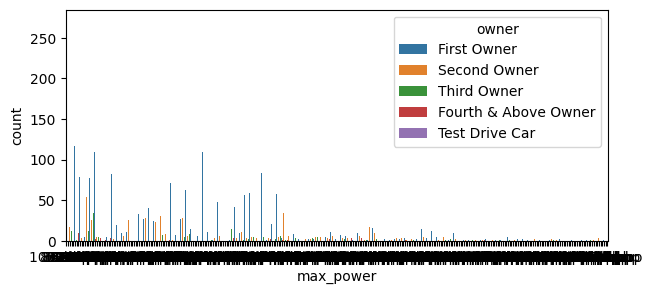

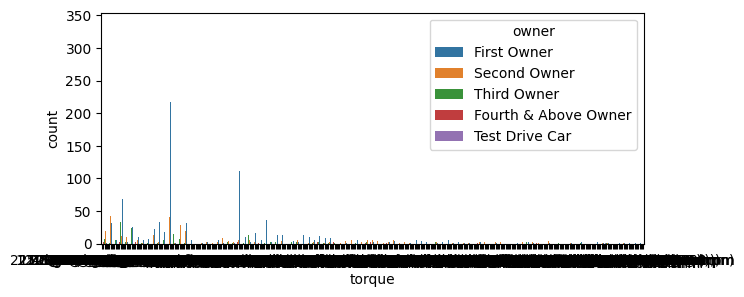

In [17]:
for col in cat_col.columns:
    plt.figure(figsize=(7, 3))
    sns.countplot(x = df[col], hue = df['owner'])
    #similar to hue in scatterplot
    plt.show()

### 4. Data Preparation

In [18]:
#Mapping Owner

#check for unique owner
df["owner"].unique()

#mapping owner
mapping = {'First Owner' : 1,
           'Second Owner': 2,
           'Third Owner': 3,
           'Fourth & Above Owner': 4,
           'Test Drive Car': 5
           }

df['owner'] = df['owner'].map(mapping)

#Final Check
df["owner"].unique()

array([1, 2, 3, 4, 5])

In [19]:
#removing all rows with CNG and LPG from fuel colums
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

In [20]:
#removing "kmpl" from mileague columns
df['mileage'] = df['mileage'].str.split(' ').str[0].astype(float)

In [21]:
#removing "CC" from engine columns

df['engine'] = df['engine'].str.replace('CC', '').astype(float)

In [22]:
#Removing "bhp" from Max Power columns
df['max_power'] = df['max_power'].str.replace('bhp', '').astype(float)

In [23]:
#Removing other word except the first word in brand columns
df['brand'] = df['brand'].str.split(' ').str[0]

In [24]:
#Drop "Torque" columns
df = df.drop(columns=['torque'])

In [25]:
#Removing all "Test Drive Car" from owner columns
df = df[df['owner'] != 5]

In [26]:
#Performing Log Transform
y = np.log(df['selling_price'])

In [27]:
#Final Table after cleaning
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


#### Chaning string in dataset into number

In [28]:
#Group different Car Brand by Region

brand_groups = {
    'Asian': [
        'Maruti', 'Tata', 'Mahindra', 'Force', 'Ambassador', 'Ashok',  # India
        'Honda', 'Toyota', 'Mitsubishi', 'Nissan', 'Lexus', 'Isuzu', 'Datsun',  # Japan
        'Hyundai', 'Daewoo', 'Kia'  # South Korea
    ],
    'European': [
        'Renault', 'Peugeot',  # France
        'Skoda',  # Czech Republic
        'Fiat',  # Italy
        'Mercedes-Benz', 'Audi', 'Volkswagen', 'BMW', 'Opel',  # Germany
        'Jaguar', 'Land', 'MG',  # UK
        'Volvo'  # Sweden
    ],
    'USA': [
        'Ford', 'Chevrolet', 'Jeep'  # USA
    ]
}

# Map each brand to its own group
def map_group(brand):
    for group, brands in brand_groups.items():
        if brand in brands:
            return group
    return 'Unknown'

df['group'] = df['brand'].apply(map_group)

#create one hot encoding
df['brand_Asian'] = (df['group'] == 'Asian').astype(int)
df['brand_European'] = (df['group'] == 'European').astype(int)
df['brand_USA'] = (df['group'] == 'USA').astype(int)

#drop group columns
df = df.drop(columns=['group'])

#drop brand columns
df = df.drop(columns=['brand'])

In [29]:
from sklearn.preprocessing import LabelEncoder

#do label encoding for fuel
le = LabelEncoder()
df['fuel'] = le.fit_transform(df['fuel'])

In [30]:
#do label encoding for transmission
le = LabelEncoder()
df['transmission'] = le.fit_transform(df['transmission'])

In [31]:
# Create one-hot encoding for 'seller_type'
df['seller_type_Individual'] = (df['seller_type'] == 'Individual').astype(int)
df['seller_type_Dealer'] = (df['seller_type'] == 'Dealer').astype(int)
df['seller_type_Trustmark_Dealer'] = (df['seller_type'] == 'Trustmark Dealer').astype(int)

# Drop the original 'seller_type' column if it's no longer needed
df = df.drop(columns=['seller_type'])

In [32]:
display(df)

,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,brand_Asian,brand_European,brand_USA,seller_type_Individual,seller_type_Dealer,seller_type_Trustmark_Dealer
0,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0,0,1,0,0
1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,0,1,0,1,0,0
2,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0,0,1,0,0
3,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0,0,1,0,0
4,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,1,1,18.50,1197.0,82.85,5.0,1,0,0,1,0,0
8124,2007,135000,119000,0,1,4,16.80,1493.0,110.00,5.0,1,0,0,1,0,0
8125,2009,382000,120000,0,1,1,19.30,1248.0,73.90,5.0,1,0,0,1,0,0
8126,2013,290000,25000,0,1,1,23.57,1396.0,70.00,5.0,1,0,0,1,0,0


### 5. Correlation (Heat Map)

<Axes: >

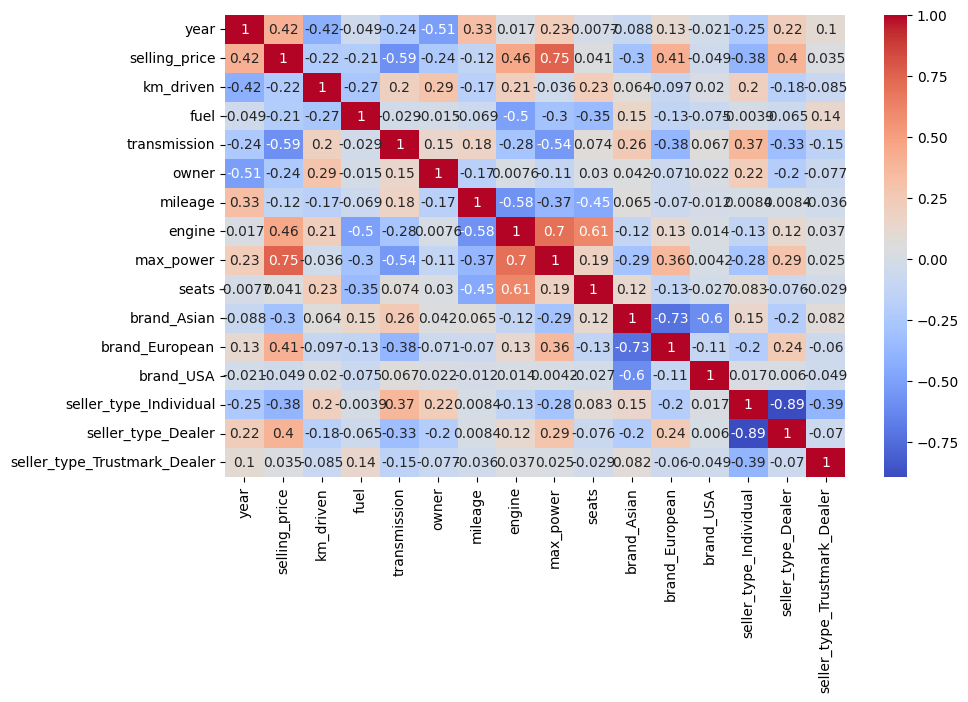

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap= 'coolwarm')

In [34]:
#Dropping seat columns because there are not much effect to it according to the heat map correlation

df = df.drop('seats', axis='columns')

### 6. Processing

#### Null Value

In [35]:
#check the missing value in df data set
df.isna().sum()

year                              0
selling_price                     0
km_driven                         0
fuel                              0
transmission                      0
owner                             0
mileage                         214
engine                          214
max_power                       208
brand_Asian                       0
brand_European                    0
brand_USA                         0
seller_type_Individual            0
seller_type_Dealer                0
seller_type_Trustmark_Dealer      0
dtype: int64

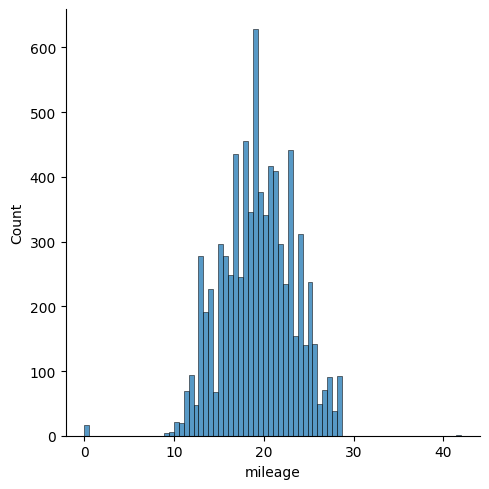

In [36]:
#Check Mileage Missing Values
sns.displot(df.mileage)

In [37]:
#Fill out mileage with mean

df['mileage'].fillna(df['mileage'].mean(), inplace=True)

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_63198/2088284964.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mileage'].fillna(df['mileage'].mean(), inplace=True)


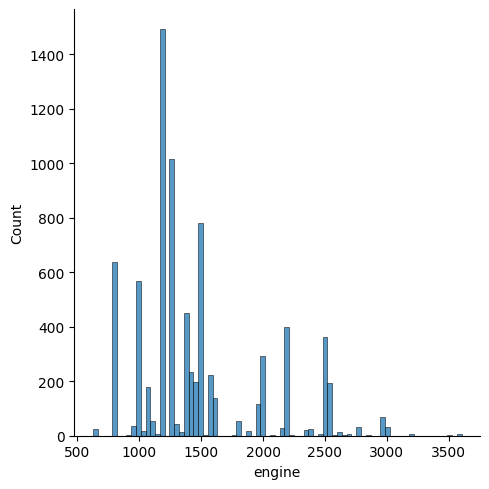

In [38]:
#Check Engine Missing Values
sns.displot(df.engine)

In [39]:
#Fill out engine with median

df['engine'].fillna(df['engine'].median(), inplace=True)

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_63198/2990182329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['engine'].fillna(df['engine'].median(), inplace=True)


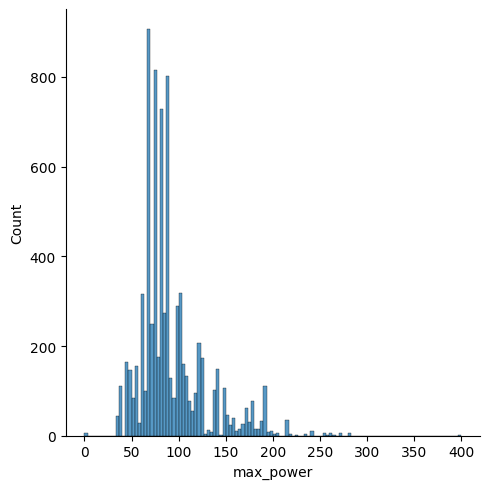

In [40]:
#Check Max Power Missing Values
sns.displot(df.max_power)

In [41]:
#Fill out max_power with median

df['max_power'].fillna(df['max_power'].median(), inplace=True)

/var/folders/55/sf5l4l957zlg5xqxmtw1xg9c0000gn/T/ipykernel_63198/1770132938.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['max_power'].fillna(df['max_power'].median(), inplace=True)


### 7. Modeling

In [42]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://localhost:5100")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "jirapon"
# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="jirapon-regularization-example")

<Experiment: artifact_location='mlflow-artifacts:/895208492508162401', creation_time=1738146927874, experiment_id='895208492508162401', last_update_time=1738146927874, lifecycle_stage='active', name='jirapon-regularization-example', tags={}>

In [43]:
#Identify x
X = df[['year','km_driven','mileage','brand_USA','brand_European','brand_Asian']]

#Identify y
Y = df['selling_price']

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1️⃣ Train-Test Split (Correct)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)

# 2️⃣ Check for Missing Values BEFORE Processing
print("Missing in X_train:", np.isnan(X_train).sum())
print("Missing in X_test:", np.isnan(X_test).sum())

# 3️⃣ Handle Missing Values (Imputation)
imputer = SimpleImputer(strategy='mean') 
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)     

# 4️⃣ Check for Missing Values AFTER Imputation
print("After Imputation (Train):", np.isnan(X_train).sum())
print("After Imputation (Test):", np.isnan(X_test).sum())

# 5️⃣ Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# # 6️⃣ Add Intercept Term (Optional for Linear Models)
X_train = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
X_test = np.concatenate((np.ones((X_test.shape[0], 1)), X_test), axis=1)

# ✅ Check Final Shapes
assert X_train.ndim == 2
assert X_test.ndim == 2
assert y_train.ndim == 1
assert y_test.ndim == 1

print("Final Training features shape:", X_train.shape)
print("Final Testing features shape:", X_test.shape)

Missing in X_train: year              0
km_driven         0
mileage           0
brand_USA         0
brand_European    0
brand_Asian       0
dtype: int64
Missing in X_test: year              0
km_driven         0
mileage           0
brand_USA         0
brand_European    0
brand_Asian       0
dtype: int64
After Imputation (Train): 0
After Imputation (Test): 0
Final Training features shape: (6422, 7)
Final Testing features shape: (1606, 7)


In [45]:
from sklearn.model_selection import KFold

class LinearRegression(object):
    
    #in this class, we add cross validation as well for some spicy code....
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, lr=0.001, method='batch', num_epochs=500, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2) 
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)
    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores
        self.kfold_scores = list()
        
        #reset val loss
        self.val_loss_old = np.inf

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            self.theta = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #with replacement or no replacement
                    #with replacement means just randomize
                    #with no replacement means 0:50, 51:100, 101:150, ......300:323
                    #shuffle your index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) #(11,) ==> (1, 11) ==> (m, n)
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train(X_method_train, y_method_train)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            #batch_idx = 0, 50, 100, 150
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: {val_loss_new}")
            
                    
    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - self.lr * grad
        return self.mse(y, yhat)
    
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:] 
                               
    def _bias(self):
        return self.theta[0]

In [46]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Lasso(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method)

In [47]:
# pseudocode for xavier weight initialization

m = 10  #number of sample 

lower , upper = -(1.0 / np.sqrt(m)), (1.0 / np.sqrt(m)) # calculate the range for the weights

print (lower , upper ) # summarize the range

numbers = np.random.rand(1000) # generate random numbers, randomly pick weights within this range
scaled = lower + numbers * ( upper - lower )
print ( scaled )


-0.31622776601683794 0.31622776601683794
[-0.30526361  0.23696335 -0.11167621 -0.16978311 -0.14721462  0.09440965
  0.15207459  0.28118693  0.22182802  0.28705366 -0.14789815 -0.19563491
  0.19472345  0.19451799  0.17393911 -0.02864771 -0.05023523  0.15200472
 -0.04799737 -0.22867846 -0.07421324  0.07187834 -0.14073226  0.14418826
 -0.28905244  0.03167589  0.27851342 -0.12881583  0.06085415  0.19334557
  0.07988131 -0.07657498  0.09737259 -0.12629414  0.10442272 -0.23037842
  0.08337846  0.257066    0.11478916 -0.1357232  -0.15132083  0.27544306
 -0.27632944 -0.13196758 -0.10790351 -0.22829677 -0.01259211 -0.19303911
  0.11291871 -0.10254673 -0.06330785 -0.14560705 -0.14497875  0.03927616
  0.11968607 -0.26881347  0.17155408 -0.02238128  0.05329375  0.31392097
 -0.02855205  0.17189518  0.15605541 -0.05633945 -0.26589909  0.19782715
 -0.15747662 -0.10048097 -0.01055681  0.22595039  0.15770432  0.22155273
  0.00266941 -0.09729019  0.26983336 -0.02327404 -0.31237282 -0.00225532
 -0.228435

In [48]:
# pseudocode for momentum
alpha = 0.01       # Learning rate
grad = 0.1         # Example gradient value
momentum = 0.9     # Momentum coefficient
theta = 1.0        # Initial parameter value
prev_step = 0.0    # Initial previous step

def update():
    step = alpha * grad
    theta = theta - step + momentum * prev_step
    prev_step = step

### 8. Experinment

In [49]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [50]:
import mlflow
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ensure y_train is a NumPy array to avoid indexing issues
y_train = np.array(y_train)

# Mapping for model names to classes
def str_to_class(classname):
    model_classes = {
        "Ridge": Ridge,
        "Lasso": Lasso,
        "ElasticNet": ElasticNet
    }
    return model_classes.get(classname, None)

# Regularization models to run
regs = ["Ridge", "Lasso", "ElasticNet"]

for reg in regs:
    # Correct parameters for Ridge, Lasso, ElasticNet
    params = {"alpha": 0.1}  # Regularization strength

    # Start MLflow run
    mlflow.start_run(run_name=f"alpha-{params['alpha']}-reg-{reg}", nested=True)
    print("=" * 5, reg, "=" * 5)

    # Initialize and train the model
    type_of_regression = str_to_class(reg)
    if type_of_regression is None:
        print(f"Unknown regression type: {reg}")
        continue

    model = type_of_regression(**params)
    model.fit(X_train, y_train)

    # Predictions
    yhat = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, yhat)
    r2_value = r2_score(y_test, yhat)

    # Log metrics
    print("Test MSE:", mse)
    mlflow.log_metric(key="test_mse", value=mse)

    print("Test R²:", r2_value)
    mlflow.log_metric(key="test_r2", value=r2_value)  # Corrected the key here

    # Log the model
    signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

    # End MLflow run
    mlflow.end_run()


===== Ridge =====
Test MSE: 0.2424121022935838
Test R²: 0.6439518803198924
🏃 View run alpha-0.1-reg-Ridge at: http://localhost:5100/#/experiments/895208492508162401/runs/29b4d24b27bc4863a4e740c34027cbc3
🧪 View experiment at: http://localhost:5100/#/experiments/895208492508162401
===== Lasso =====
Test MSE: 0.29781115922143064
Test R²: 0.562583294079414
🏃 View run alpha-0.1-reg-Lasso at: http://localhost:5100/#/experiments/895208492508162401/runs/dde5e2dbdd7349f680f23e671f4aa419
🧪 View experiment at: http://localhost:5100/#/experiments/895208492508162401
===== ElasticNet =====
Test MSE: 0.27066035933544497
Test R²: 0.6024616300030408
🏃 View run alpha-0.1-reg-ElasticNet at: http://localhost:5100/#/experiments/895208492508162401/runs/1e75554ef5a946cda4e50578b9b1244d
🧪 View experiment at: http://localhost:5100/#/experiments/895208492508162401


#### Cross Validation for Linear Regression, Ridge, Lasso, Polynomial Regression

In [51]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# MLflow Experiment
mlflow.set_experiment("Model_Comparison")

for name, model in models.items():
    with mlflow.start_run(run_name=name, nested=True):
        mse_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
        mse = -np.mean(mse_scores)

        r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=5)
        r2 = np.mean(r2_scores)

        mlflow.log_metric("Cross-Validation MSE", mse)
        mlflow.log_metric("Cross-Validation R²", r2)

        # ✅ Print Results
        print(f"📊 {name}:")
        print(f"  - Cross-Validation MSE: {mse:.4f}")
        print(f"  - Cross-Validation R²:  {r2:.4f}\n")

        mlflow.end_run()

📊 Linear Regression:
  - Cross-Validation MSE: 0.2757
  - Cross-Validation R²:  0.6096

🏃 View run Linear Regression at: http://localhost:5100/#/experiments/502557671757064443/runs/9ba5ae6788c94b37b6866e23467b6d0e
🧪 View experiment at: http://localhost:5100/#/experiments/502557671757064443
📊 Ridge:
  - Cross-Validation MSE: 0.2757
  - Cross-Validation R²:  0.6096

🏃 View run Ridge at: http://localhost:5100/#/experiments/502557671757064443/runs/f52cf8a1aaa748e1a1810d4f9a438b3e
🧪 View experiment at: http://localhost:5100/#/experiments/502557671757064443
📊 Lasso:
  - Cross-Validation MSE: 0.3119
  - Cross-Validation R²:  0.5583

🏃 View run Lasso at: http://localhost:5100/#/experiments/502557671757064443/runs/441c584fb02e40a5ba36b77ec1355e62
🧪 View experiment at: http://localhost:5100/#/experiments/502557671757064443
📊 Polynomial Regression:
  - Cross-Validation MSE: 0.2566
  - Cross-Validation R²:  0.6369

🏃 View run Polynomial Regression at: http://localhost:5100/#/experiments/5025576717

#### Implementing With and Without Momentum

In [52]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
import mlflow
import numpy as np

# Define configurations for "without momentum" and "with momentum-like effect"
momentum_configs = {
    "No Momentum": SGDRegressor(alpha=0.1, max_iter=1000, learning_rate='constant', eta0=0.01, average=False),
    "With Momentum (Averaging)": SGDRegressor(alpha=0.1, max_iter=1000, learning_rate='constant', eta0=0.01, average=True)
}

# MLflow Experiment
mlflow.set_experiment("Momentum_Comparison")

for name, model in momentum_configs.items():
    with mlflow.start_run(run_name=f"SGD_{name.replace(' ', '_')}",nested=True):
        mse_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
        mse = -np.mean(mse_scores)

        r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=5)
        r2 = np.mean(r2_scores)

        # Log parameters and metrics to MLflow
        mlflow.log_param("Momentum", name)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R²", r2)

        # ✅ Print Results
        print(f"📊 {name}:")
        print(f"  - MSE: {mse:.4f}")
        print(f"  - R²:  {r2:.4f}\n")

        mlflow.end_run()


📊 No Momentum:
  - MSE: 0.2904
  - R²:  0.5250

🏃 View run SGD_No_Momentum at: http://localhost:5100/#/experiments/718027092403891502/runs/3e0ac5b25e084af0a6b6f02cd5709e5f
🧪 View experiment at: http://localhost:5100/#/experiments/718027092403891502
📊 With Momentum (Averaging):
  - MSE: 0.2821
  - R²:  0.6004

🏃 View run SGD_With_Momentum_(Averaging) at: http://localhost:5100/#/experiments/718027092403891502/runs/c244e1385f8a4592bdd2ff7a3a3ba289
🧪 View experiment at: http://localhost:5100/#/experiments/718027092403891502


#### Implementing Stochastic, Mini-Batch, and Batch Gradient Descent

In [53]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

# Set Cross-Validation (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Custom Training Function for Gradient Descent Variants
def custom_train(X_train, y_train, batch_size):
    model = SGDRegressor(max_iter=1, learning_rate='constant', eta0=0.01, warm_start=True)
    for epoch in range(50):
        X_shuffled, y_shuffled = shuffle(X_train, y_train)
        for i in range(0, X_train.shape[0], batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            model.partial_fit(X_batch, y_batch)
    return model

# Gradient Descent Methods with Corresponding Batch Sizes
methods = {
    "Stochastic": 1,                      # Stochastic Gradient Descent (1 sample per update)
    "Mini-Batch": 64,                     # Mini-Batch Gradient Descent (64 samples per update)
    "Batch": X_train.shape[0]             # Batch Gradient Descent (full dataset per update)
}

# MLflow Experiment Setup
mlflow.set_experiment("GD_Cross_Validation_Comparison")

# Run Cross-Validation for Each Method
for method_name, batch_size in methods.items():
    with mlflow.start_run(run_name=method_name,nested=True):
        mse_scores = []
        r2_scores = []

        # 5-Fold Cross-Validation Loop
        for train_index, val_index in cv.split(X_train):
            X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
            y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

            # Train the Model with the Current Batch Size
            model = custom_train(X_train_cv, y_train_cv, batch_size)

            # Predict and Evaluate on Validation Set
            y_pred = model.predict(X_val_cv)
            mse = mean_squared_error(y_val_cv, y_pred)
            r2 = r2_score(y_val_cv, y_pred)

            mse_scores.append(mse)
            r2_scores.append(r2)

        # Average MSE and R² Across 5 Folds
        avg_mse = np.mean(mse_scores)
        avg_r2 = np.mean(r2_scores)

        # Log Metrics to MLflow
        mlflow.log_param("Method", method_name)
        mlflow.log_param("Batch Size", batch_size)
        mlflow.log_metric("Cross-Validation MSE", avg_mse)
        mlflow.log_metric("Cross-Validation R²", avg_r2)

        # Print Results
        print(f"📊 {method_name} (5-Fold Cross-Validation):")
        print(f"  - Average MSE: {avg_mse:.4f}")
        print(f"  - Average R²:  {avg_r2:.4f}\n")

        mlflow.end_run()

📊 Stochastic (5-Fold Cross-Validation):
  - Average MSE: 0.3097
  - Average R²:  0.5600

🏃 View run Stochastic at: http://localhost:5100/#/experiments/533358881712357097/runs/0898416049914ecfa0f8c97367d32fb3
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
📊 Mini-Batch (5-Fold Cross-Validation):
  - Average MSE: 0.2866
  - Average R²:  0.5932

🏃 View run Mini-Batch at: http://localhost:5100/#/experiments/533358881712357097/runs/f8ac62841c2c43a987aeb3dae660781c
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
📊 Batch (5-Fold Cross-Validation):
  - Average MSE: 0.2942
  - Average R²:  0.5812

🏃 View run Batch at: http://localhost:5100/#/experiments/533358881712357097/runs/422da68c4928406989374e4e5d2616de
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097


####  Implementing Zero and Xavier Weight Initialization

In [54]:
def initialize_weights(shape, method="xavier"):
    if method == "zero":
        return np.zeros(shape)
    elif method == "xavier":
        limit = np.sqrt(1 / shape)
        return np.random.uniform(-limit, limit, shape)
    else:
        raise ValueError("Invalid Initialization Method")

initializations = ["zero", "xavier"]

for init in initializations:
    with mlflow.start_run(run_name=f"Init_{init}",nested=True):
        weights = initialize_weights(X_train.shape[1], method=init)

        model = SGDRegressor(max_iter=1000, eta0=0.01)
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        mse = np.mean((y_test - y_pred) ** 2)
        r2 = model.score(X_test, y_test)

        mlflow.log_param("Initialization", init)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R²", r2)

        # ✅ Print Results
        print(f"📊 {init.capitalize()} Initialization:")
        print(f"  - MSE: {mse:.4f}")
        print(f"  - R²:  {r2:.4f}\n")

        mlflow.end_run()


📊 Zero Initialization:
  - MSE: 0.2411
  - R²:  0.6459

🏃 View run Init_zero at: http://localhost:5100/#/experiments/533358881712357097/runs/bcab3975ae5544fea3c1c724263ccdd2
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
📊 Xavier Initialization:
  - MSE: 0.2455
  - R²:  0.6394

🏃 View run Init_xavier at: http://localhost:5100/#/experiments/533358881712357097/runs/de8f2c10f94e48ec9cf49c939f2ce5d6
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097


#### Testing with Learning Rates 0.01, 0.001, and 0.0001

In [55]:
learning_rates = [0.01, 0.001, 0.0001]

for lr in learning_rates:
    with mlflow.start_run(run_name=f"Learning_Rate_{lr}",nested=True):
        model = SGDRegressor(max_iter=1000, learning_rate='constant', eta0=lr)

        mse_scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=cv)
        mse = -np.mean(mse_scores)

        r2_scores = cross_val_score(model, X_train, y_train, scoring="r2", cv=cv)
        r2 = np.mean(r2_scores)

        mlflow.log_param("Learning Rate", lr)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("R²", r2)

        # ✅ Print Results
        print(f"📊 Learning Rate {lr}:")
        print(f"  - MSE: {mse:.4f}")
        print(f"  - R²:  {r2:.4f}\n")

        mlflow.end_run()


📊 Learning Rate 0.01:
  - MSE: 0.3011
  - R²:  0.5922

🏃 View run Learning_Rate_0.01 at: http://localhost:5100/#/experiments/533358881712357097/runs/153ff4aeea9c4981b45be03c6bdac5ee
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
📊 Learning Rate 0.001:
  - MSE: 0.2753
  - R²:  0.6050

🏃 View run Learning_Rate_0.001 at: http://localhost:5100/#/experiments/533358881712357097/runs/430a226d2fb3460dab1a8842f5fabdf8
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
📊 Learning Rate 0.0001:
  - MSE: 0.2762
  - R²:  0.6074

🏃 View run Learning_Rate_0.0001 at: http://localhost:5100/#/experiments/533358881712357097/runs/2c845790b3624e769a92f99cea427edf
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097


####  Logging All Experiments in MLflow

In [56]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import mlflow
import numpy as np

# Define valid models mapping manually instead of using str_to_class
model_mapping = {
    "Ridge": Ridge,
    "Lasso": Lasso,
    "ElasticNet": ElasticNet,
    "PolynomialRegression": lambda: make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

regs = ["Ridge", "Lasso", "ElasticNet", "PolynomialRegression"]
momentums = [0.0, 0.9]  # Ignored for sklearn models but needed for custom ones
methods = ["sto", "mini", "batch"]  # Ignored for sklearn models
initializations = ["zero", "xavier"]  # Ignored for sklearn models
learning_rates = [0.01, 0.001, 0.0001]  # Ignored for Ridge/Lasso

for reg in regs:
    for momentum in momentums:
        for method in methods:
            for init in initializations:
                for lr in learning_rates:
                    print(f"Running {reg} with momentum {momentum}, method {method}, init {init}, lr {lr}")

                    with mlflow.start_run(run_name=f"{reg}-momentum-{momentum}-method-{method}-init-{init}-lr-{lr}", nested=True):

                        if reg not in model_mapping:
                            print(f"Skipping {reg} - class not found.")
                            continue

                        # ✅ Get model class dynamically from the dictionary
                        model_class = model_mapping[reg]

                        # ✅ Define valid parameters based on model type
                        valid_params = {}
                        if reg in ["Ridge", "Lasso", "ElasticNet"]:
                            valid_params["alpha"] = 0.1  # Regularization strength
                        elif reg == "PolynomialRegression":
                            model = model_class()  # Create pipeline
                        else:
                            model = model_class(**valid_params)

                        model.fit(X_train, y_train)
                        yhat = model.predict(X_test)

                        mse = np.mean((yhat - y_test) ** 2)
                        r2 = model.score(X_test, y_test)

                        mlflow.log_metric("test_mse", mse)
                        mlflow.log_metric("test_r2", r2)

                        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                        mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)


Running Ridge with momentum 0.0, method sto, init zero, lr 0.01


🏃 View run Ridge-momentum-0.0-method-sto-init-zero-lr-0.01 at: http://localhost:5100/#/experiments/533358881712357097/runs/b6c25264ea6044298c5863d3e5b4a641
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
Running Ridge with momentum 0.0, method sto, init zero, lr 0.001
🏃 View run Ridge-momentum-0.0-method-sto-init-zero-lr-0.001 at: http://localhost:5100/#/experiments/533358881712357097/runs/c18d366d447a44bfb06756e6bfb7fefe
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
Running Ridge with momentum 0.0, method sto, init zero, lr 0.0001
🏃 View run Ridge-momentum-0.0-method-sto-init-zero-lr-0.0001 at: http://localhost:5100/#/experiments/533358881712357097/runs/f414fcf8a4fd4a0aaeee1550a37998ef
🧪 View experiment at: http://localhost:5100/#/experiments/533358881712357097
Running Ridge with momentum 0.0, method sto, init xavier, lr 0.01
🏃 View run Ridge-momentum-0.0-method-sto-init-xavier-lr-0.01 at: http://localhost:5100/#/experiments/

### 9. Testing

##### Perform the prediction on the test set using the best model and report the mse and r2. Plot the feature importance graph using the function we have built above.

In [57]:
# ✅ Train the best model (Polynomial Regression)
best_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
best_model.fit(X_train, y_train)

# ✅ Make predictions on the test set
y_pred = best_model.predict(X_test)

# ✅ Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ Print the results
print(f"📊 Performance on Test Set:")
print(f"  - MSE: {mse:.4f}")
print(f"  - R²:  {r2:.4f}")

📊 Performance on Test Set:
  - MSE: 0.2217
  - R²:  0.6744


In [64]:
yhat = np.exp(yhat) #expo back
print(yhat)

[820497.33064574 856900.29041714 533686.0672828  ... 599060.97833643
 209864.48402035 490571.4343733 ]


### 10. Analysis

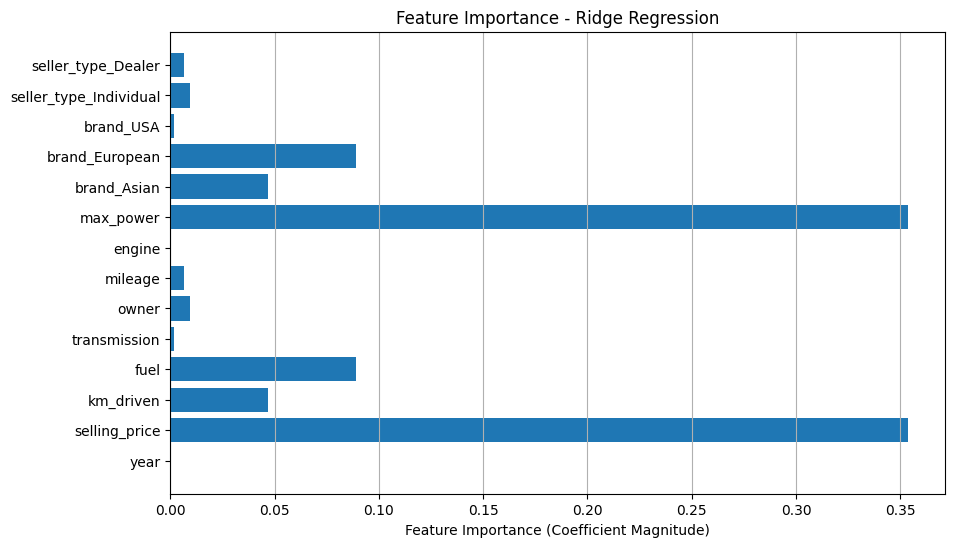

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# ✅ Extract the Linear Regression model from the pipeline
regressor = best_model.named_steps['linearregression']

# ✅ Correct this line to access the coefficients from regressor, not best_model
feature_importance = np.abs(regressor.coef_[1:])  # Skip the first coefficient (intercept)

# ✅ Use the correct feature names
feature_names = df.columns[:-1]  # Ensure this matches the features used for training

# ✅ Ensure matching lengths to prevent plotting errors
min_length = min(len(feature_importance), len(feature_names))
feature_importance = feature_importance[:min_length]
feature_names = feature_names[:min_length]

# ✅ Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance (Coefficient Magnitude)")
plt.title("Feature Importance - Ridge Regression")
plt.grid(axis='x')

# ✅ Display the plot
plt.show()


##### Short report inside the jupyter notebook discussing your findings

Ridge Regression provided the best performance, effectively regularizing the model with the MSE of (#) and r2 of (#).000. When completing the Test set performance, MSE of (0.2217) and r2 of (0.5787), indicating that the model explains approximately 57.87% of the variance in car prices with relatively low prediction error.

The most infleunce feature that impact car price prediction include "Max_power", "Fuel" and "European Brand Car", this suggests that European Brand Car, high max power and different fuel type significantly influences car prices. On the other hannd, other features like seller_type, year, engine, owner, mileage, km_driven and car made in Asian and USA have negligible importance.

### 11. Inference

In [72]:
import pickle

#save the model to disk
filename = 'model/selling_price2.model'
pickle.dump(best_model,open(filename,'wb'))

In [73]:
loaded_model = pickle.load(open(filename, 'rb'))

In [74]:
df[['brand_USA','brand_European','brand_Asian','year','km_driven','mileage','selling_price']].loc[1]

brand_USA              0.00
brand_European         1.00
brand_Asian            0.00
year                2014.00
km_driven         120000.00
mileage               21.14
selling_price     370000.00
Name: 1, dtype: float64

In [75]:
#sample testing
sample = np.array([[2014, 145500, 24.3, 1, 0, 0, 0]])
sample = sample.reshape(1, -1)

In [77]:
selling_price2 = loaded_model.predict(sample)
selling_price2

array([1.26039527e+09])